In [329]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Plot function for tests:

In [330]:
def plot_area_between_functions(func1, func2, lower_bound = 1, upper_bound = 100):
    x = np.linspace(lower_bound, upper_bound, 1000)
    plt.plot(x, func1(x), label='func1')
    plt.plot(x, func2(x), label='func2')
    plt.fill_between(x, func1(x), func2(x), alpha=0.5)
    plt.legend()
    plt.show()

My code

Find roots

In [331]:
import random
def add_root_to_list(X, root, maxerr):
    for i in X[::-1]:  # go backwards, makes more sense
        if abs(root - i) < maxerr:  # if root is "epsilon" close to a different root in list, return
            return None
    # if the root is not in the list:
    X.append(root)

def find_root_bisection_method(a, b, maxerr, func):
    # a,b being 2 initial guesses bracketing the root (different sign)
    delta = 2 * maxerr
    while not abs(b - a) < delta:
        z = (a + b) / 2
        if func(a) * func(z) < 0:
            b = z
        else:
            a = z
    return (a + b) / 2  # (a+b)/2 should be closer to the root than a or b statistically

def find_root_newton_raphson_bisec(a, b, maxerr, func,max_iter = 5):
    '''
    This function implements the Newton Raphson algorithm
    and in failed case moves directly to bisection method
    return: A single root of func in the given range [a,b]
    '''
    x0 = random.uniform(a, b)  # initial point as random -> middle of section
    find_der_in_point = lambda f, x, h = 0.0001: (f(x + h) - f(x)) / h
    for n in range(0, max_iter):  # Forloop to prevent recalculation every iteration
        f_x0 = func(x0)  # Precalculate for efficiency
        if abs(f_x0) < maxerr:  # Found solution after max_iter iterations.
            return x0
        der_x0 = find_der_in_point(func, x0)
        if der_x0 == 0:  # Zero derivative, No solution found
            return find_root_bisection_method(a, b, maxerr, func)  # Failed? try bisection
        x0 = x0 - f_x0 / der_x0  # Exceeded maximum iterations, No solution found. Try bisection.
    return find_root_bisection_method(a, b, maxerr, func)  # Failed? try bisection

def intersections(f1: callable, f2: callable, a: float, b: float, maxerr=0.001):
    """
    Find as many intersection points as you can. The assignment will be
    tested on functions that have at least two intersection points, one
    with a positive x and one with a negative x.

    This function may not work correctly if there is infinite number of
    intersection points. 

    Approach: In order to improve running times and since I wish to find all the roots,
    I'll only visit a section if there is a root in it (via intermediate theorem)

    Parameters
    ----------
    f1 : callable
        the first given function
    f2 : callable
        the second given function
    a : float
        beginning of the interpolation range.
    b : float
        end of the interpolation range.
    maxerr : float
        An upper bound on the difference between the
        function values at the approximate intersection points.


    Returns
    -------
    X : iterable of approximate intersection Xs such that for each x in X:
        |f1(x)-f2(x)|<=maxerr.

    """

    X = []  # list of roots found during the run
    intersect_func = lambda x: 100000 * (f1(x) - f2(x))
    # creates the intersect function out of f1 and f2 - both parameters in main function

    # I'll create a loop scanning the domain [a,b] from side to side
    # every section of the domain will be checked using the root finding methods by hierarchy
    h = abs(b - a) * (maxerr/2)  # Divide into proportional sections
    #n_sections = math.ceil(abs(b - a) / h)
    left = a
    right = a + h

    while right <= b:
        # Are the limits of the section the roots? if so -> finish loop on section
        if abs(intersect_func(left)) < maxerr:
            X.append(left)

        elif abs(intersect_func(right)) < maxerr:
            X.append(right)

        # Check for bracketing, Else, leave section
        else:
            if intersect_func(left) * intersect_func(right) < 0:
                root = find_root_newton_raphson_bisec(left, right, maxerr, intersect_func)
                if left <= root <= right:
                    X.append(root)
                    # If found root -> take a smaller step forward
                    left = root + h
                    right = left + h
                    continue
        left = right
        right += h

    return X

Intergration

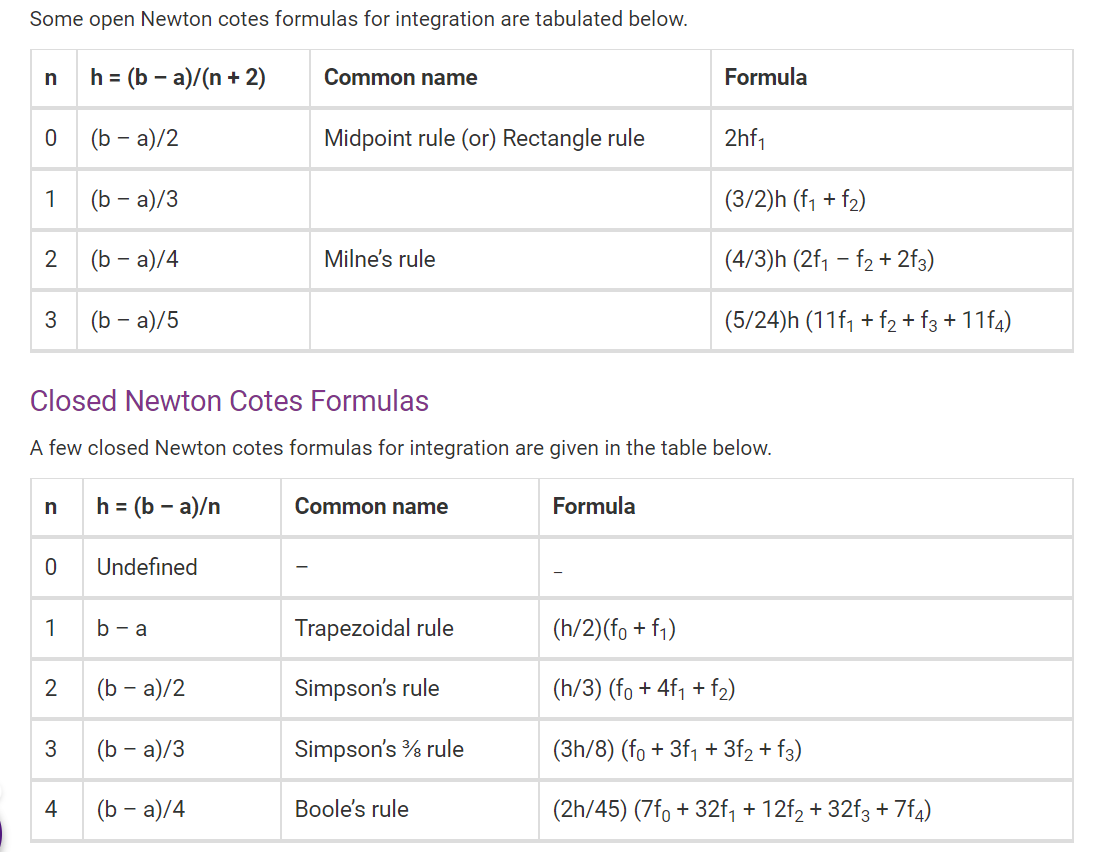

In [332]:
def integrateClose1(f: callable, a: float, b: float, n: int) -> np.float32:
    if n == 1:
        return np.float32(0)
    # calculating step size
    h = (b - a) / (n-1)
    S = 0.0
    for i in range(0,n-1): 
        k = a + i*h
        S += (f(k) + f(k+h))

    # Interpolation using The closed trapezodial rule
    return np.float32(S * h/2)

In [333]:
def integrateClose2_1(f: callable, a: float, b: float, n: int) -> np.float32:
    if n == 1:
      return np.float32(0)

    if n % 2 == 0:
        n -= 1

    #  Divide into sections
    h = (b - a) / (n - 1)
    xs = np.linspace(a, b, n)  # n points make n-1 sub-intervals
    ys = np.array([f(x) for x in xs])

    # Interpolation using Simpson's rule of 2nd degree - Closed
    S = h / 3 * np.sum(ys[0:-1:2] + 4 * ys[1::2] + ys[2::2])
    return np.float32(S)

In [334]:
def integrateClose2_2(f: callable, a: float, b: float, n: int) -> np.float32:
    if n == 1:
        return np.float32(0)
    # calculating step size
    h = (b - a) / n
    
    # Finding sum 
    integration = f(a) + f(b)
    for i in range(1,n): 
        k = a + i*h
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)

    # Interpolation using Simpson's rule of 2nd degree - Closed
    return np.float32(integration * h/3)

In [335]:
# when n is even this works like version closed2_1
# when n is odd this works like version closed2_2
# This cannot be addmitted!!! too many calls to n
def integrateClose2_3(f: callable, a: float, b: float, n: int) -> np.float32: 
    if n == 1:
        return np.float32(0)
    
    if n % 2 == 0:
      n -= 1

    # calculating step size
    h = (b - a) / (n - 1)
    
    # Finding sum 
    integration = 0.0
    for i in range(0,n,2):
      k = a + i * h 
      integration += f(k) + 4*f(k + h) + f(k + 2*h)

    # Interpolation using Simpson's rule of 2nd degree - Closed
    return np.float32(integration * h/3)

In [336]:
def integrateOpen_0(f: callable, a: float, b: float, n: int) -> np.float32:  # Rectangle rule
    tmp = 0
    S = 0
    h = (b-a) / n # Number of sections
    d = h/2
    # For every section, go to the middle of the section and return 2f(xi)
    for i in range(0,n): # Using the n points
      xi = a + i*h + d
      tmp += f(xi) # Measure at the middle fo the section
    S = h * tmp
    return np.float32(S)

In [337]:
def integrateOpen_1(f: callable, a: float, b: float, n: int) -> np.float32:  # trapezodial rule
    
    # points needs to be dividable to groups of 2
    if n % 2 != 0:
        n -= 1
    if n < 2:
        return np.float32(0)
    # Outer step -> sections, on each we'll use 3 points
    n_of_section_for_n = n//2
    outer_section = (b - a) / n_of_section_for_n # The size of each section

    # calculating inner step size - h. 4 steps in every section "outer_section"
    h = outer_section / 3
    
    # Finding sum 
    integration = 0.0
    xi = a
    while xi < b:
        integration += (f(xi + h) + f(xi + 2*h))
        xi += outer_section

    # Interpolation using newton-Coles rule of 1st degree - Open
    return np.float32((3/2)*h*integration)

In [338]:
def integrateOpen_2(f: callable, a: float, b: float, n: int) -> np.float32:  # Milne's Rule
    
    # points needs to be dividable to groups of 3
    if n % 3 != 0:
      if n % 3 == 1:
        n -= 1
      else:
        n -= 2
    if n < 3:
        return np.float32(0)
    # Outer step -> sections, on each we'll use 3 points
    n_of_section_for_n = n//3
    outer_section = (b - a) / n_of_section_for_n # The size of each section

    # calculating inner step size - h. 4 steps in every section "outer_section"
    h = outer_section / 4
    
    # Finding sum 
    integration = 0.0
    xi = a
    while xi < b:
        integration += (2 * f(xi+h) - f(xi + 2*h) + 2 * f(xi + 3*h))
        xi += outer_section

    # Interpolation using newton-Coles rule of 2nd degree - Open
    return np.float32((4/3)*h*integration)

In [339]:
def integrateOpen_3(f: callable, a: float, b: float, n: int) -> np.float32:  # Milne's Rule
    
    # points needs to be dividable to groups of 4
    if n % 4 != 0:
      if n % 3 == 1:
        n -= 1
      elif n % 3 == 2:
        n -= 2
      else:
        n -= 3
    if n < 4:
        return np.float32(0)
    # Outer step -> sections, on each we'll use 4 points
    n_of_section_for_n = n//4
    outer_section = (b - a) / n_of_section_for_n # The size of each section

    # calculating inner step size - h. 5 steps in every section "outer_section"
    h = outer_section / 5
    
    # Finding sum 
    integration = 0.0
    xi = a
    while xi < b:
        integration += (11 * f(xi+h) + f(xi + 2*h) +  f(xi + 3*h) + 11 * f(xi + 4*h))
        xi += outer_section

    # Interpolation using newton-Coles rule of 3rd degree - Open
    return np.float32((5/24)*h*integration)

In [340]:
def milnes_rule_n(f, a, b, n):
  # Calculate the step size
  h = (b - a) / n

  # Initialize the sum
  integral = 0

  # Iterate over the sample points
  for i in range(1, n):
    # Calculate the value of x at the current sample point
    x = a + i * h

    # Add the weighted value of the function at the sample point to the sum
    if i % 4 == 1:
      integral += 7 * f(x)
    elif i % 4 == 2:
      integral += 32 * f(x)
    elif i % 4 == 3:
      integral += 12 * f(x)
    else:
      integral += 32 * f(x)

  # Add the value of the function at the last sample point to the sum
  integral += 7 * f(b)

  # Return the approximated integral
  return (h / 45) * integral


In [341]:
def integrateClose3(f: callable, a: float, b: float, n: int) -> np.float32:  #  Simpson’s ⅜ rule
  # Calculate the step size
  h = (b - a) / n

  # Initialize the sum
  integral = 0

  # Iterate over the sample points
  for i in range(n):
    # Calculate the value of x at the current sample point
    x = a + i * h

    # Add the weighted value of the function at the sample point to the sum
    if i == 0 or i == n:
      integral += f(x)
    elif i % 3 == 1:
      integral += 9 * f(x)
    elif i % 3 == 2:
      integral += 6 * f(x)
    else:
      integral += 3 * f(x)

  # Return the approximated integral
  return np.float32((3 * h / 8) * integral)


In [342]:
def integrateClose4(f: callable, a: float, b: float, n: int) -> np.float32:  # Boole’s rule
  # Calculate the step size
  h = (b - a) / n

  # Initialize the sum
  integral = 0

  # Iterate over the sample points
  for i in range(n):
    # Calculate the value of x at the current sample point
    x = a + i * h

    # Add the weighted value of the function at the sample point to the sum
    if i == 0 or i == n:
      integral += f(x)
    elif i % 4 == 1:
      integral += 14 * f(x)
    elif i % 4 == 2:
      integral += 32 * f(x)
    elif i % 4 == 3:
      integral += 14 * f(x)
    else:
      integral += 7 * f(x)

  # Return the approximated integral
  return np.float32((2 * h / 45) * integral)


In [343]:
##################################################################
# Recursive generation of the Legendre polynomial of order n
def Legendre(n, x):
    x = np.array(x)
    if n == 0:
        return x * 0 + 1.0
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * Legendre(n - 1, x) - (n - 1) * Legendre(n - 2, x)) / n


##################################################################
# Derivative of the Legendre polynomials
def DLegendre(n, x):
    x = np.array(x)
    if n == 0:
        return x * 0
    elif n == 1:
        return x * 0 + 1.0
    else:
        return (n / (x ** 2 - 1.0)) * (x * Legendre(n, x) - Legendre(n - 1, x))


##################################################################
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder, tolerance=1e-20):
    if polyorder < 2:
        err = 1  # bad polyorder no roots can be found
    else:
        roots = []
        # The polynomials are alternately even and odd functions. So we evaluate only half the number of roots.
        for i in range(1, int(polyorder / 2) + 1):
            x = np.cos(np.pi * (i - 0.25) / (polyorder + 0.5))
            error = 10 * tolerance
            iters = 0
            while (error > tolerance) and (iters < 1000):
                dx = -Legendre(polyorder, x) / DLegendre(polyorder, x)
                x = x + dx
                iters = iters + 1
                error = abs(dx)
            roots.append(x)
        # Use symmetry to get the other roots
        roots = np.array(roots)
        if polyorder % 2 == 0:
            roots = np.concatenate((-1.0 * roots, roots[::-1]))
        else:
            roots = np.concatenate((-1.0 * roots, [0.0], roots[::-1]))
        err = 0  # successfully determined roots
    return [roots, err]


##################################################################
# Weight coefficients
def GaussLegendreWeights(polyorder):
    W = []
    [xis, err] = LegendreRoots(polyorder)
    if err == 0:
        W = 2.0 / ((1.0 - xis ** 2) * (DLegendre(polyorder, xis) ** 2))
        err = 0
    else:
        err = 1  # could not determine roots - so no weights
    return [W, xis, err]


##################################################################
# The integral value
# func 		: the integrand
# a, b 		: lower and upper limits of the integral
# polyorder 	: order of the Legendre polynomial to be used (number of points)
#
def GaussLegendreQuadrature(func, polyorder, a, b):
    [Ws, xs, err] = GaussLegendreWeights(polyorder)
    result = 0
    for x, w in zip(xs, Ws):
        result += w * func((b - a) * 0.5 * x + (b + a) * 0.5)
    return (b - a) * 0.5 * result
    #return (b - a) * 0.5 * np.sum(Ws * func((b - a) * 0.5 * xs + (b + a) * 0.5))


def integrate_Gauss_Quadrature(f, a, b, n):
    # let n be the maximal number of points that can be sampled from f
    # let's use Gausses method for splines of the function, using 2 to 3 points at the time
    S = 0
    points_per_section = 2
    if n % 2 != 0:
      n -= 1
    num_sections = n // points_per_section
    for i in range(num_sections):
        # divide the range into sections
        start = a + i * (b - a) / num_sections
        end = a + (i + 1) * (b - a) / num_sections
        S += GaussLegendreQuadrature(f, points_per_section, start, end)
        
    # handle the remaining points
    remaining_points = n % points_per_section
    if remaining_points > 0:
        start = b - (b - a) / num_sections
        S += GaussLegendreQuadrature(f, remaining_points, start, b)
    
    return S


In [344]:
def integrate_Gauss_np(f, lower, upper, num_points):
    def subinterval_integral(f, lower, upper, num_points):
        x, w = np.polynomial.legendre.leggauss(num_points)
        x = (upper - lower) / 2 * x + (upper + lower) / 2
        y = [f(x) for x in x]
        return sum(w * y) * (upper - lower) / 2

    subinterval_width = (upper - lower) / num_points
    integral = 0
    for i in range(num_points):
        subinterval_lower = lower + i * subinterval_width
        subinterval_upper = subinterval_lower + subinterval_width
        integral += subinterval_integral(f, subinterval_lower, subinterval_upper, num_points)
    return integral



In [345]:
def areabetween(f1: callable, f2: callable) -> np.float32:
    f = lambda x: f1(x) - f2(x)  # The area between 2 functions is the integral of the 2 in range

    # First, return all intersects between f1 and f2
    maxerr = 0.01
    Intersects = np.array(intersections(f1, f2, 1, 100, maxerr), dtype=np.float32)
    integrate = lambda f,a,b,n: integrateClose2_1(f, a, b, n)

    S = 0
    if len(Intersects) < 2:
        return np.NaN

    for i in range(len(Intersects) - 1):
        S += abs(integrate(f, Intersects[i], Intersects[i + 1], 100))
    return np.float32(S)


In [346]:
func1 = lambda x: (x+3)**2 - 4
func2 = lambda x: -((x+3)**2) + 4
areabetween(func1, func2)

nan

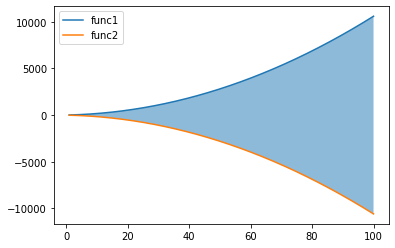

In [347]:
plot_area_between_functions(func1, func2, 1, 100)

In [348]:
# Lets create a Program that will show us the gain from the number of sections I create on different functions
import math
#Test functions from assignment:
f0 = lambda x: x - 1
f1 = lambda x: 5
f2 = lambda x: x**2 -3*x + 5
f3 = lambda x: math.sin(x**2)
f4 = lambda x: math.e**(-2*x**2)
f5 = lambda x: math.atan(x)
f6 = lambda x: 1/math.log(x+201) 
f7 = lambda x: math.e**math.e**x #error
f8 = lambda x: math.log(math.log(x+201)) #error
f9 = lambda x: math.sin(math.log(x+201)) #error 
f21 = lambda x: (math.sin(x))/x 
f22 = lambda x: (2**(1/(x**2)))*math.sin(1/x) #error

#Other functions:
f10 = lambda x: 4* math.sin(10*x) - math.cos(x/7)*x + x + 2
f11 = lambda x: x**3
f12 = lambda x: math.sin(x)
f13 = lambda x: 5*(x**3) - 5*(x**2) -5*x -5
f14 = lambda x: 5*(x**2) - 1
f15 = lambda x: x - 1
f16 = lambda x: -2*(x**2) + 2
f17 = lambda x: 2*(x**2) - 2
f18 = lambda x: math.cos(x/309)
f19 = lambda x: x**5 - 34*x**4 +276*x**2 -987
f20 = lambda x: math.sin(x**5) + x**2 - 987
f23 = lambda x: x**3 - x**4
f24 = lambda x: x**6 - 50*x**2 +276*x**7 -98788747
f25 = lambda x: x**10 - 2*x**9 +5*x**7 -98788747*x + x**5
f26 = lambda x: 7*x**9 - 2*x**5 +5*x**10 -1298788747*x + x**6
f27 = lambda x: math.e**x
functions = [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23]

הטסטים שאינם מוסתרים הם הטסטים לפי תוכנית הציונים המעודכנת

In [349]:
def Check_Itegrate(integration_func, res=[],n=20):
  integrate_function = lambda f, a, b: integration_func(f, a, b, n) # Try based on a small n
  '''
  f0 = lambda x: x - 1
  r = 6
  d = abs(integrate_function(f0,-1,5)-r)
  print(d)
  res.append(d)
  f1 = lambda x: 5
  r = 30
  d = abs(integrate_function(f1,-1,5)-r) 
  print(d)
  res.append(d)
  f2 = lambda x: x**2 -3*x + 5
  r = 13225/6
  d = abs(integrate_function(f2,-3,20)-r)
  print(d)
  res.append(d)
  f3 = lambda x: math.sin(x**2)
  r = 0.04228482346
  d = abs(integrate_function(f3,0.9,2)-r)
  print(d)
  res.append(d)
  f4 = lambda x: math.e**(-2*x**2)
  r = 0.34372
  d = abs(integrate_function(f4,0.3,30)-r)
  print(d)
  res.append(d)
  f5 = lambda x: math.atan(x)
  r = 2.23297
  d = abs(integrate_function(f5,-0.9,3)-r)
  print(d)
  res.append(d)
  f6 = lambda x: 1/math.log(x+201) 
  r = 0.86674
  d = abs(integrate_function(f6,1,3)-r)
  print(d)
  res.append(d)
  f7 = lambda x: math.e**x
  r = (math.e)**7 - math.e
  d = abs(integrate_function(f7,1,7)-r)
  print(d)
  res.append(d)
  f8 = lambda x: math.log(math.log(x+201))
  r = 0.7262811424
  d = abs(integrate_function(f8,1,3)-r)
  print(d)
  res.append(d)
  f9 = lambda x: math.sin(math.log(x+201)) #error 
  r = 9.822208587*10**-3
  d = abs(integrate_function(f9,1,3)-r)
  print(d)
  res.append(d)
  f10 = lambda x: (math.sin(x))/x 
  r = 0.3489890619
  d = abs(integrate_function(f10,1,3)-r)
  print(d)
  res.append(d)
  
  f11 = lambda x: 2** (1/(x**2)) * (np.sin(1/x))  # The function "Strong osculations"
  r = -7.78662 * 10 ** 33
  d = abs(integrate_function(f11,0.9,2)-r)
  print(d)
  res.append(d)
  '''
  f12 = lambda x: 5
  r = 15
  d = abs(integrate_function(f12,2,5)-r)
  print(d)
  res.append(d)
  f13 = lambda x: pow(x, 2) - 3 * x + 2
  r = 202.666666666666
  d = abs(integrate_function(f13,2,10)-r)
  print(d)
  res.append(d)
  f14 = lambda x: math.sin(pow(x, 2))
  r = 0.467969502583427
  d = abs(integrate_function(f14,5,1.5)-r)
  print(d)
  res.append(d)
  f15 = lambda x: 5 * pow(x, 2) - 10 * x + 1
  r = 35.3333333
  d = abs(integrate_function(f15,2,4)-r)
  print(d)
  res.append(d)
  f16 = lambda x: pow(x, 2) - 5 * x + 2
  r = 37.5
  d = abs(integrate_function(f16,5,8)-r)
  print(d)
  res.append(d)
  return f'Sum of errors is: {sum(res)}'


In [350]:
def Check_Itegrate_no_print(integration_func, res=[],n=3):
  integrate_function = lambda f, a, b: integration_func(f, a, b, n) # Try based on a small n
  '''
  f0 = lambda x: x - 1
  r = 6
  d = abs(integrate_function(f0,-1,5)-r)
  res.append(d)
  f1 = lambda x: 5
  r = 30
  d = abs(integrate_function(f1,-1,5)-r) 
  res.append(d)
  f2 = lambda x: x**2 -3*x + 5
  r = 13225/6
  d = abs(integrate_function(f2,-3,20)-r)
  res.append(d)
  f3 = lambda x: math.sin(x**2)
  r = 0.04228482346
  d = abs(integrate_function(f3,0.9,2)-r)
  res.append(d)
  f4 = lambda x: math.e**(-2*x**2)
  r = 0.34372
  d = abs(integrate_function(f4,0.3,30)-r)
  res.append(d)
  f5 = lambda x: math.atan(x)
  r = 2.23297
  d = abs(integrate_function(f5,-0.9,3)-r)
  res.append(d)
  f6 = lambda x: 1/math.log(x+201) 
  r = 0.86674
  d = abs(integrate_function(f6,1,3)-r)
  res.append(d)
  f7 = lambda x: math.e**x
  r = (math.e)**7 - math.e
  d = abs(integrate_function(f7,1,7)-r)
  res.append(d)
  f8 = lambda x: math.log(math.log(x+201))
  r = 0.7262811424
  d = abs(integrate_function(f8,1,3)-r)
  res.append(d)
  f9 = lambda x: math.sin(math.log(x+201)) #error 
  r = 9.822208587*10**-3
  d = abs(integrate_function(f9,1,3)-r)
  res.append(d)
  f10 = lambda x: (math.sin(x))/x 
  r = 0.3489890619
  d = abs(integrate_function(f10,1,3)-r)
  res.append(d)

  f11 = lambda x: 2** (1/(x**2)) * (np.sin(1/x)) # The function "Strong osculations"
  r = -7.78662 * 10 ** 33
  d = abs(integrate_function(f11,0.9,10)-r)
  res.append(d)
  '''
  f12 = lambda x: 5
  r = 15
  d = abs(integrate_function(f12,2,5)-r)
  res.append(d)
  f13 = lambda x: pow(x, 2) - 3 * x + 2
  r = 202.666666666666
  d = abs(integrate_function(f13,2,10)-r)
  res.append(d)
  f14 = lambda x: math.sin(pow(x, 2))
  r = 0.467969502583427
  d = abs(integrate_function(f14,5,1.5)-r)
  res.append(d)
  f15 = lambda x: 5 * pow(x, 2) - 10 * x + 1
  r = 35.3333333
  d = abs(integrate_function(f15,2,4)-r)
  res.append(d)
  f16 = lambda x: pow(x, 2) - 5 * x + 2
  r = 37.5
  d = abs(integrate_function(f16,5,8)-r)
  res.append(d)  
  return sum(res)


In [351]:
integration_functions = [integrateClose1,integrateClose2_1,integrateClose2_2,integrateClose2_3,integrateOpen_0,integrateOpen_1,integrateOpen_2,integrateOpen_3,milnes_rule_n,integrateClose3,integrateClose4,integrate_Gauss_Quadrature,integrate_Gauss_np]
#integration_functions = [integrate_Gauss_Quadrature]

In [352]:
def Compare_integrate_functions(integration_functions):
  Ns = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,30,31,40,41,50,99,100]
  res = [Ns]
  sublist = []
  for n in Ns:
    for func in integration_functions:
      sublist.append(Check_Itegrate_no_print(func,[],n))
    print(f'For {n} points the best integration function is number {sublist.index(min(sublist))} which is {integration_functions[sublist.index(min(sublist))]}')
    sublist = []

In [353]:
print(Compare_integrate_functions(integration_functions))

For 3 points the best integration function is number 12 which is <function integrate_Gauss_np at 0x7f73fb69e430>
For 4 points the best integration function is number 12 which is <function integrate_Gauss_np at 0x7f73fb69e430>
For 5 points the best integration function is number 12 which is <function integrate_Gauss_np at 0x7f73fb69e430>
For 6 points the best integration function is number 11 which is <function integrate_Gauss_Quadrature at 0x7f73fb69e820>
For 7 points the best integration function is number 11 which is <function integrate_Gauss_Quadrature at 0x7f73fb69e820>
For 8 points the best integration function is number 12 which is <function integrate_Gauss_np at 0x7f73fb69e430>
For 9 points the best integration function is number 12 which is <function integrate_Gauss_np at 0x7f73fb69e430>
For 10 points the best integration function is number 11 which is <function integrate_Gauss_Quadrature at 0x7f73fb69e820>
For 11 points the best integration function is number 11 which is <func

צור בדיקה עבור השטח החוזר בין 2 פונקציות ובפרט, האם קיימים מקרים בהם חוזר שטח שלילי?
לשים לב - לא אמור.

In [354]:
def test_areabetween():
    f1 = lambda x: (x-5)**2
    f2 = lambda x: 2*x
    expected = 48.64382
    result = areabetween(f1, f2)
    print(f"Expected {expected}, but got {result}, error: {result - expected}")

    f1 = lambda x: (x-10)**2
    f2 = lambda x: 4
    expected = 32/3
    result = areabetween(f1, f2)
    print(f"Expected {expected}, but got {result}, error: {result - expected}")

    f1 = lambda x: math.sin(math.log(x))
    f2 = lambda x: pow(x, 2) - 3 * x + 2
    expected = 0.731257
    result = areabetween(f1, f2)
    print(f"Expected {expected}, but got {result}, error: {result - expected}")

    f1 = lambda x: 5*(x-5) + 2
    f2 = lambda x: (x-5)**3
    expected = 2.4064 + 11.31325
    result = areabetween(f1, f2)
    print(f"Expected {expected}, but got {result}, error: {result - expected}")

    # f1 = lambda x: math.log(x)
    # f2 = lambda x: 20 * math.sin(x)
    # expected = 2131.10
    # result = areabetween(f1, f2)
    # print(f"Expected {expected}, but got {result}, error: {result - expected}") #3.085 to 97.159

    f1 = lambda x: math.log(x+200) + 5*(x+5) -2*(x-5)**2
    f2 = lambda x: 2*math.log(x+5)
    expected = 370.94237
    result = areabetween(f1, f2)
    print(f"Expected {expected}, but got {result}, error: {result - expected}")



In [355]:
print(test_areabetween())

Expected 48.64382, but got 48.643829345703125, error: 9.345703126939497e-06
Expected 10.666666666666666, but got 10.666666984558105, error: 3.178914393942023e-07
Expected 0.731257, but got 0.7312568426132202, error: -1.5738677983101468e-07
Expected 13.71965, but got 13.720526695251465, error: 0.0008766952514651649
Expected 370.94237, but got 370.9423828125, error: 1.2812500017389539e-05
None


Base function for Gauss integration:

In [356]:
##################################################################
# Recursive generation of the Legendre polynomial of order n
def Legendre(n, x):
    x = np.array(x)
    if n == 0:
        return x * 0 + 1.0
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * Legendre(n - 1, x) - (n - 1) * Legendre(n - 2, x)) / n


##################################################################
# Derivative of the Legendre polynomials
def DLegendre(n, x):
    x = np.array(x)
    if n == 0:
        return x * 0
    elif n == 1:
        return x * 0 + 1.0
    else:
        return (n / (x ** 2 - 1.0)) * (x * Legendre(n, x) - Legendre(n - 1, x))


##################################################################
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder, tolerance=1e-20):
    if polyorder < 2:
        err = 1  # bad polyorder no roots can be found
    else:
        roots = []
        # The polynomials are alternately even and odd functions. So we evaluate only half the number of roots.
        for i in range(1, int(polyorder / 2) + 1):
            x = np.cos(np.pi * (i - 0.25) / (polyorder + 0.5))
            error = 10 * tolerance
            iters = 0
            while (error > tolerance) and (iters < 1000):
                dx = -Legendre(polyorder, x) / DLegendre(polyorder, x)
                x = x + dx
                iters = iters + 1
                error = abs(dx)
            roots.append(x)
        # Use symmetry to get the other roots
        roots = np.array(roots)
        if polyorder % 2 == 0:
            roots = np.concatenate((-1.0 * roots, roots[::-1]))
        else:
            roots = np.concatenate((-1.0 * roots, [0.0], roots[::-1]))
        err = 0  # successfully determined roots
    return [roots, err]


##################################################################
# Weight coefficients
def GaussLegendreWeights(polyorder):
    W = []
    [xis, err] = LegendreRoots(polyorder)
    if err == 0:
        W = 2.0 / ((1.0 - xis ** 2) * (DLegendre(polyorder, xis) ** 2))
        err = 0
    else:
        err = 1  # could not determine roots - so no weights
    return [W, xis, err]


##################################################################
# The integral value
# func 		: the integrand
# a, b 		: lower and upper limits of the integral
# polyorder 	: order of the Legendre polynomial to be used
#
def GaussLegendreQuadrature(func, polyorder, a, b):
    [Ws, xs, err] = GaussLegendreWeights(polyorder)
    if err == 0:
        ans = (b - a) * 0.5 * sum(Ws * func((b - a) * 0.5 * xs + (b + a) * 0.5))
    else:
        # (in case of error)
        err = 1
        ans = None
    return [ans, err]


##################################################################
# The integrand - change as required
def func(x):
    return np.exp(x)


##################################################################
#

order = 5
[Ws, xs, err] = GaussLegendreWeights(order)
if err == 0:
    print("Order    : ", order)
    print("Roots    : ", xs)
    print("Weights  : ", Ws)
else:
    print("Roots/Weights evaluation failed")

# Integrating the function
[ans, err] = GaussLegendreQuadrature(func, order, 1, 100)
if err == 0:
    print("Integral : ", ans)
else:
    print("Integral evaluation failed")

Order    :  5
Roots    :  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights  :  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Integral :  3.032227432300602e+42
